In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('electricity_bill.csv')
df.head()

,Units_Consumed,Electricity_Bill
0,152,1010.93
1,485,3861.19
2,398,3210.64
3,320,2678.67
4,156,1239.04


In [32]:
df.tail()

,Units_Consumed,Electricity_Bill
495,199,1640.91
496,363,2577.80
497,107,1047.46
498,391,2989.52
499,354,2232.16


In [33]:
df.shape

(500, 2)

In [34]:
df.ndim

2

In [35]:
df.dtypes

Units_Consumed        int64
Electricity_Bill    float64
dtype: object

In [36]:
df.isna().sum()

Units_Consumed      0
Electricity_Bill    0
dtype: int64

In [37]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
x

,Units_Consumed
0,152
1,485
2,398
3,320
4,156
...,...
495,199
496,363
497,107
498,391


In [39]:
y

0      1010.93
1      3861.19
2      3210.64
3      2678.67
4      1239.04
        ...   
495    1640.91
496    2577.80
497    1047.46
498    2989.52
499    2232.16
Name: Electricity_Bill, Length: 500, dtype: float64

Text(0, 0.5, 'Bill')

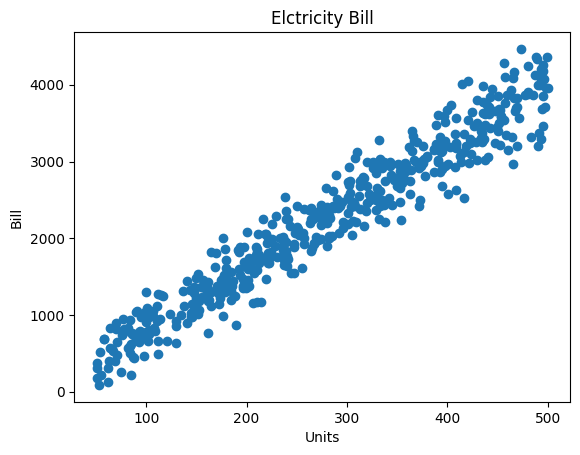

In [40]:
plt.scatter(x,y)
plt.title('Elctricity Bill')
plt.xlabel('Units')
plt.ylabel('Bill')

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([3743.95263922,  856.56808192, 2932.36346636, 3900.02748016,
       1543.29738203, 2682.64372086, 2518.76513788, 2409.51274922,
       1316.98886267, 3915.63496425,  903.3905342 , 1832.03583776,
       3119.65327548, 3299.13934255, 1434.04499338, 1106.28782741,
       2955.7746925 , 3158.67198571,  918.99801829, 1777.40964343,
       3892.22373811, 3821.99005969, 3876.61625401,  926.80176034,
       1153.11027969, 3431.80295735,  817.54937168, 1691.56848092,
        840.96059782, 3088.43830729, 2284.65287647,  739.51195121,
       2253.43790829, 3244.51314823, 1020.4466649 , 2690.44746291,
       2971.38217659, 1270.16641039, 3299.13934255, 1949.09196846,
       2807.50359361, 2409.51274922, 3626.89650852, 3915.63496425,
       1683.76473887,  723.90446712, 3580.07405624,  481.98846367,
        466.38097958, 3072.8308232 ,  552.22214209, 1379.41879905,
        997.03543876, 2253.43790829, 1613.53106045,  848.76433987,
       1582.31609226, 3182.08321185, 1457.45621952, 3088.43830

In [43]:
print(model.predict([[152]]))

[1238.95144221]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


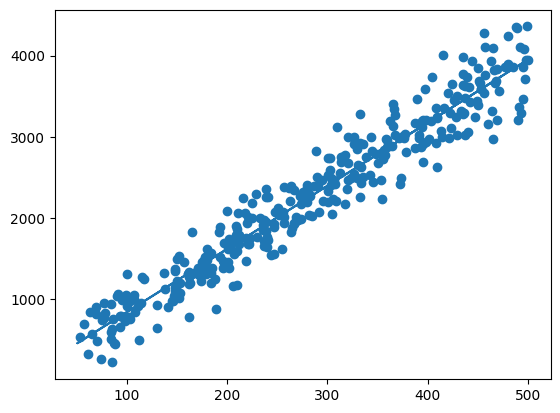

In [44]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred)

In [45]:
#slope
print(model.coef_)

[7.80374205]


In [46]:
#y intercept or constant
print(model.intercept_)

52.78265109777067


In [47]:
#Dataframe
#Actual value,Predicted value,Difference
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
304,4466.78,3743.952639,722.827361
340,794.84,856.568082,-61.728082
47,2988.87,2932.363466,56.506534
67,4204.59,3900.027480,304.562520
479,1840.52,1543.297382,297.222618
...,...,...,...
331,689.30,505.399690,183.900310
197,3036.33,2651.428753,384.901247
95,2255.17,2112.970551,142.199449
122,656.39,926.801760,-270.411760


In [48]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
#MAE
m1=mean_absolute_error(y_test,y_pred)
m1

214.67056989724307

In [49]:
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))
print("r2: ",r2_score(y_test,y_pred))

MAPE:  0.18367918093473629
MSE:  73427.44200508166
RMSE: 270.97498409462384
r2:  0.9421432414816016
